# Import Data

In [158]:
import numpy as np
import pandas as pd

In [159]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [160]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


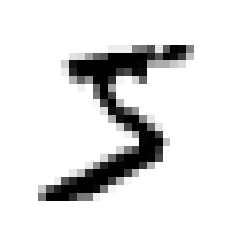

In [161]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

In [162]:
y[0]

'5'

In [163]:
y = y.astype(np.uint8)

In [164]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

In [165]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [166]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

In [167]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

# Confusion Matrix

In [168]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [169]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

# Precision and Recall

In [170]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [171]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [172]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [173]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [174]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [175]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')

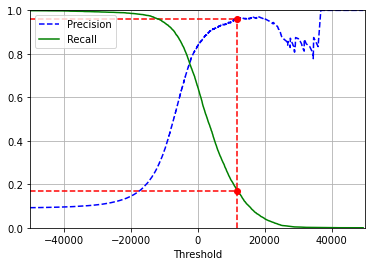

In [176]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend()
    plt.grid()
    plt.xlim(-50000, 50000)
    plt.ylim(0, 1)
    plt.xticks(np.arange(-40000, 60000, 20000))
    
    
    

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot(thresholds[59000], precisions[59000], 'ro')
plt.vlines(x = thresholds[59000], ymin = 0, ymax = precisions[59000], linestyles = 'dashed', colors = 'red')
plt.hlines(y = precisions[59000], xmin = -50000, xmax = thresholds[59000], linestyles = 'dashed', colors = 'red')
plt.plot(thresholds[59000], recalls[59000], 'ro')
plt.hlines(y = recalls[59000], xmin = -50000, xmax = thresholds[59000], linestyles = 'dashed', colors = 'red')
plt.show()

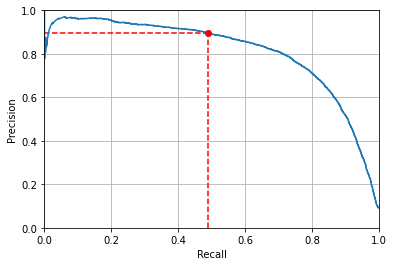

In [177]:
plt.plot(recalls, precisions)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recalls[57000], precisions[57000], 'ro')
plt.vlines(x = recalls[57000], ymin = 0, ymax = precisions[57000], linestyles = 'dashed', colors = 'red')
plt.hlines(y = precisions[57000], xmin = 0, xmax = recalls[57000], linestyles = 'dashed', colors = 'red')
plt.show()

In [180]:
threshold_90_precision = thresholds[np.argmax(precisions >= .90)]

In [181]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [182]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [183]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

# The ROC Curve

In [184]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

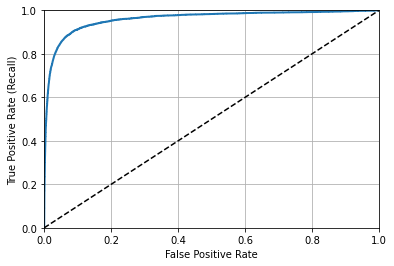

In [188]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid()
    plt.xlim(0, 1)
    plt.ylim(0, 1)

plot_roc_curve(fpr, tpr)
plt.show()

In [189]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [191]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = 'predict_proba')

In [193]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

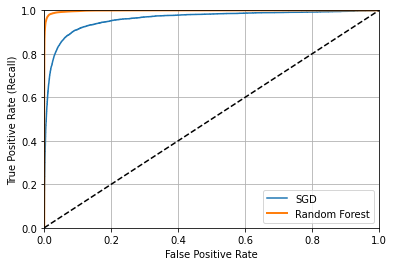

In [195]:
plt.plot(fpr, tpr, label = 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc = 'lower right')
plt.show()

In [196]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145